In [ ]:
!pip install Biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.7 MB/s eta 0:00:00


In [119]:
from Bio import Entrez
import os
Entrez.email = "A.N.Other@example.com"
os.mkdir('data')


FileExistsError: ignored

In [120]:
id_ = 'CP045163.1'
record = Entrez.efetch(db="nucleotide", id=id_, rettype="fasta",
                           retmode="text")
filename = './data/Record_{}.fasta'.format(id_)
print('Writing:{}'.format(filename))
with open(filename, 'w') as f:
    f.write(record.read())

Writing:./data/Record_CP045163.1.fasta


In [121]:
filename = ''.join(os.listdir('./data'))
filename

'Record_CP045163.1.fasta'

In [122]:
from Bio import SeqIO

# Парсим последовательность с помощью SeqIO

In [123]:
data = list(SeqIO.parse('./data/' + filename, 'fasta'))

In [124]:
sequence = ''.join(list(data[0].seq)) # извлекаем из data последовательность преобразуя ее сначала в список а потом в строку
sequence

'GTGTCACTTTCGCTTTGGCAGCAGTGTCTTGCCCGATTGCAGGATGAGTTACCTGCCACAGAATTTAGTATGTGGATACGCCCCCTACAGGCGGAACTGAGTGACAATACTCTGGCGCTTTACGCACCTAACCGTTTTGTACTGGACTGGGTCCGTGATAAGTACTTAAACAATATCAATGGCTTACTTAATGATTTTTGTGGCACCGAGGTCCCTTTACTGCGTTTTGAGGTAGGGAGTAAACCTGCGGCAAGAGCACACAATAATCCAGTTACAGCCAGCGTGAGTGCGCCTGTTGCTCCGGTTACCCGCAGTGCACCTATGCGCCCGAGCTGGGACAACTCACCTGCTCAGCCTGAACTTTCTTATCGTTCGAATGTGAATCCAAAACACACATTTGATAACTTTGTTGAAGGTAAATCTAACCAGTTGGCCCGCGCTGCCGCCCGTCAGGTAGCCGATAACCCAGGTGGTGCCTATAACCCGTTATTTCTTTATGGCGGAACAGGCTTGGGTAAAACCCATCTGCTACACGCGGTGGGGAATGGCATTATGGCCCGTAAAGCCAATGCTAAAGTGGTCTATATGCATTCCGAGCGTTTTGTGCAAGATATGGTCAAAGCCTTGCAAAATAATGCTATCGAAGAGTTTAAACGCTATTATCGTTCGGTTGATGCTTTATTAATCGATGATATTCAATTTTTTGCCAATAAAGAGCGTTCTCAAGAAGAGTTTTTCCACACCTTTAATGCGTTGCTAGAGGGTAATCAGCAGATCATTTTGACCTCAGATCGCTATCCAAAAGAGATTAACGGGGTGGAAGATCGTCTGAAGTCGCGTTTTGGTTGGGGGCTGACGGTCGCCATTGAGCCACCAGAGCTGGAAACGCGTGTAGCGATCCTAATGAAGAAAGCGGATGAAAATGATATTCGCTTACCAGGAGAGGTCGCGTTCTTTATTGCCAAGCGTCTGCGTTCCAATGTGCGTGAATTGGAAGGG

In [125]:
print(len(sequence)) # проверяем длину последовательности
split_by = len(sequence)//10 + 1 # нам нужно поделить на 10 частей, по этому нацело делим на 10 и прибавляем 1
split_by

4503487


450349

In [126]:
with open('full_sequence.txt', 'w') as ptr:
  ptr.write(sequence)
# записываем всю последовательность в файл

## Настраиваем EMBOSS

In [ ]:
!wget ftp://emboss.open-bio.org/pub/EMBOSS/emboss-latest.tar.gz

In [ ]:
!gunzip emboss-latest.tar.gz

In [ ]:
!tar xvf emboss-latest.tar

In [ ]:
%%bash
cd ./EMBOSS-6.6.0/
./configure

In [ ]:
%%bash
cd ./EMBOSS-6.6.0/
make

In [ ]:
!./EMBOSS-6.6.0/emboss/splitter --help

In [16]:
split_by # вспоминаем на сколько нужно делить последовательность что бы получилось 10 частей

450349

## используем ф-ю splitter, получаем данные в файл splitted_sequence.**txt**

In [127]:
!./EMBOSS-6.6.0/emboss/splitter -sequence=full_sequence.txt -outseq=splitted_sequence.txt -size=450349

Split sequence(s) into smaller sequences


# Читаем как работает compseq и компсекаем полную последовательность, результаты пишем в файл comped_seq.txt

In [ ]:
!./EMBOSS-6.6.0/emboss/compseq --help

In [128]:
!./EMBOSS-6.6.0/emboss/compseq -sequence=full_sequence.txt word=4 -outfile=comped_seq.txt

Calculate the composition of unique words in sequences


# Так как comseq выдает информацию по всем возможным комбинациям из 4 нуклеотидов, а нас интересуют только 4 из них, то пишем небольшой код для обработки файла и извлечения интесующей информации из него:

In [129]:
patterns_for_find = ['AAAA', 'ATAT', 'ATTA', 'AATT'] # создаем список с паттернами которые будем искать
raw_data_list = [] # создаем список куда будем добавлять найденные данные
with open('comped_seq.txt', 'r') as file:
  for line in file:
    for pattern in patterns_for_find:
      if pattern in line:
        raw_data_list.append(line[:10]) # удаляем из линии не нужную хвостовую информацию, нам нужно только количество встречаний в файле
        break # брикаемся с целью экономии времени выполнения
raw_data_list # проверяем что нашли что нужно

['AAAA\t37951', 'AATT\t24026', 'ATAT\t23589', 'ATTA\t24176']

In [130]:
seq_inf = {} # создаем словарь где ключем будет последовательность, а данными количество встречаний
for i in raw_data_list:
  temp_alph = [x for x in list(i) if x.isalpha()]
  temp_dig = [x for x in list(i) if x.isdigit()]
  seq_inf[''.join(temp_alph)] = int(''.join(temp_dig))
seq_inf # проверяем

{'AAAA': 37951, 'AATT': 24026, 'ATAT': 23589, 'ATTA': 24176}

In [131]:
# Принтуем информацию:
for k, v in seq_inf.items():
  print('Sequence %s has found %d times' % (k, v))

Sequence AAAA has found 37951 times
Sequence AATT has found 24026 times
Sequence ATAT has found 23589 times
Sequence ATTA has found 24176 times


In [ ]:
!./EMBOSS-6.6.0/emboss/shuffleseq --help

### С помощью модуля shuffleseq нужно перемешать каждую из 10 частей последовательности, для этого создам 10 файлов и запишем туда каждую из 10 частей, что бы потом каждый файл отработать с shuffleseq

In [22]:
os.mkdir('splitted')

In [132]:
counter = 1 # счетчик
nucl_alph = 'ATGC' # алфавит оснований
ind = False # индикатор, что бы записать в первый файл информацию, иначе он пропуститься
file = open('splitted_sequence.txt', 'r')
while counter < 11:
    if ind:
        out_file = open('./splitted/{}_part.txt'.format(counter), 'w')
        print('File number {} is writing!'.format(counter))
        counter += 1
    for line in file:
        if line[0] in nucl_alph:
            out_file.write(line)
        else:
            if ind == False:
                ind = True
                break
            break

file.close()
out_file.close()
print('All files successfully have written!')


File number 1 is writing!
File number 2 is writing!
File number 3 is writing!
File number 4 is writing!
File number 5 is writing!
File number 6 is writing!
File number 7 is writing!
File number 8 is writing!
File number 9 is writing!
File number 10 is writing!
All files successfully have written!


# Далее нужно 10 запросов shuffleseq для каждого из файлов. Проще написать shell-файл и потом его запустить. Создаем отдельную директорию, что бы не мусорить

In [24]:
os.mkdir('shuffled')

In [133]:
with open('current_tasks.sh', 'w') as ptr:
  ptr.write('for i in {1..10}\ndo\n\t./EMBOSS-6.6.0/emboss/shuffleseq -sequence=./splitted/${i}_part.txt -outseq=./shuffled/${i}_part_shuffled.txt\ndone')

In [134]:
!bash current_tasks.sh

Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition
Shuffle a set of sequences maintaining composition


## Теперь делаем тоже самое, но с функцией compseq

In [27]:
os.mkdir('comped_files')

In [135]:
with open('current_tasks.sh', 'w') as ptr:
  ptr.write('for i in {1..10}\ndo\n\t./EMBOSS-6.6.0/emboss/compseq -sequence=./shuffled/${i}_part_shuffled.txt word=4 -outfile=./comped_files/${i}_comped_seq.txt\ndone')

In [136]:
!bash current_tasks.sh

Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences


# Считаем количество АААА ААТТ АТАТ АТТА в каждом из десяти пермешанных частей

In [137]:
shuffled_data_info = {}
for i in range(1, 11):
  with open('./comped_files/{}_comped_seq.txt'.format(i), 'r') as ptr:
    for line in ptr:
      for pattern in patterns_for_find:
        if pattern in line:
          shuffled_data_info.setdefault(i, []).append(line[:10])
          break
shuffled_data_info

{1: ['AAAA\t1992\t', 'AATT\t2054\t', 'ATAT\t1956\t', 'ATTA\t2126\t'], 2: ['AAAA\t1981\t', 'AATT\t1975\t', 'ATAT\t1998\t', 'ATTA\t1994\t'], 3: ['AAAA\t2041\t', 'AATT\t2281\t', 'ATAT\t2344\t', 'ATTA\t2216\t'], 4: ['AAAA\t2072\t', 'AATT\t2177\t', 'ATAT\t2202\t', 'ATTA\t2069\t'], 5: ['AAAA\t2160\t', 'AATT\t2271\t', 'ATAT\t2273\t', 'ATTA\t2289\t'], 6: ['AAAA\t2317\t', 'AATT\t2193\t', 'ATAT\t2276\t', 'ATTA\t2255\t'], 7: ['AAAA\t2468\t', 'AATT\t2132\t', 'ATAT\t2145\t', 'ATTA\t2111\t'], 8: ['AAAA\t2289\t', 'AATT\t2192\t', 'ATAT\t2106\t', 'ATTA\t2168\t'], 9: ['AAAA\t2124\t', 'AATT\t1975\t', 'ATAT\t1951\t', 'ATTA\t1921\t'], 10: ['AAAA\t2261\t', 'AATT\t1997\t', 'ATAT\t2036\t', 'ATTA\t2033\t']}

In [138]:
temp_dict = {}
for ctr in range(1, 11):
  for i in shuffled_data_info[ctr]:
    temp_alph = [x for x in list(i) if x.isalpha()]
    temp_dig = [x for x in list(i) if x.isdigit()]
    temp_dict[''.join(temp_alph)] = int(''.join(temp_dig))
    shuffled_data_info[ctr] = temp_dict
  temp_dict = {}
shuffled_data_info # проверяем

{1: {'AAAA': 1992, 'AATT': 2054, 'ATAT': 1956, 'ATTA': 2126}, 2: {'AAAA': 1981, 'AATT': 1975, 'ATAT': 1998, 'ATTA': 1994}, 3: {'AAAA': 2041, 'AATT': 2281, 'ATAT': 2344, 'ATTA': 2216}, 4: {'AAAA': 2072, 'AATT': 2177, 'ATAT': 2202, 'ATTA': 2069}, 5: {'AAAA': 2160, 'AATT': 2271, 'ATAT': 2273, 'ATTA': 2289}, 6: {'AAAA': 2317, 'AATT': 2193, 'ATAT': 2276, 'ATTA': 2255}, 7: {'AAAA': 2468, 'AATT': 2132, 'ATAT': 2145, 'ATTA': 2111}, 8: {'AAAA': 2289, 'AATT': 2192, 'ATAT': 2106, 'ATTA': 2168}, 9: {'AAAA': 2124, 'AATT': 1975, 'ATAT': 1951, 'ATTA': 1921}, 10: {'AAAA': 2261, 'AATT': 1997, 'ATAT': 2036, 'ATTA': 2033}}

In [139]:
# Принтуем информацию:
for ctr in range(1, 11):
  print("In file %d:" % ctr)
  for k, v in shuffled_data_info[ctr].items():
    print('Sequence %s has found %d times' % (k, v))

In file 1:
Sequence AAAA has found 1992 times
Sequence AATT has found 2054 times
Sequence ATAT has found 1956 times
Sequence ATTA has found 2126 times
In file 2:
Sequence AAAA has found 1981 times
Sequence AATT has found 1975 times
Sequence ATAT has found 1998 times
Sequence ATTA has found 1994 times
In file 3:
Sequence AAAA has found 2041 times
Sequence AATT has found 2281 times
Sequence ATAT has found 2344 times
Sequence ATTA has found 2216 times
In file 4:
Sequence AAAA has found 2072 times
Sequence AATT has found 2177 times
Sequence ATAT has found 2202 times
Sequence ATTA has found 2069 times
In file 5:
Sequence AAAA has found 2160 times
Sequence AATT has found 2271 times
Sequence ATAT has found 2273 times
Sequence ATTA has found 2289 times
In file 6:
Sequence AAAA has found 2317 times
Sequence AATT has found 2193 times
Sequence ATAT has found 2276 times
Sequence ATTA has found 2255 times
In file 7:
Sequence AAAA has found 2468 times
Sequence AATT has found 2132 times
Sequence ATAT

In [140]:
shuffled_data_info['total'] = {} # объеденяем все в один total
for ctr in range(1, 11):
  for k,v in shuffled_data_info[ctr].items():
    shuffled_data_info['total'].setdefault(k, 0)
    shuffled_data_info['total'][k] += v

In [141]:
# Принтуем итоговую информацию:
for initial, shuffled in zip(seq_inf.items(), shuffled_data_info['total'].items()):
  print('Sequence %s has found %d times in initial genome and %d times in genome after shuffle' % (initial[0], initial[1], shuffled[1]))


Sequence AAAA has found 37951 times in initial genome and 21705 times in genome after shuffle
Sequence AATT has found 24026 times in initial genome and 21247 times in genome after shuffle
Sequence ATAT has found 23589 times in initial genome and 21287 times in genome after shuffle
Sequence ATTA has found 24176 times in initial genome and 21182 times in genome after shuffle


## Комбинаторно последовательность длины 4 имеет 4^4 = 256 вариантов разных олигонуклеотидов. Соответственно вероятность встретить конкретную последовательность составляет 1/256. В нативном геноме мы наблюдаем последовательность АААА 37 951 раз, что гораздо чаще чем остальные варианты. После шафла частота выравнилась для всех 4-х вариантов олигонуклеотидов, что значит что последовательность АААА имеет биологический смысл. Показажем статистическое различие средних между группами:

In [33]:
os.mkdir('comped_files_initial')

In [142]:
with open('current_tasks.sh', 'w') as ptr:
  ptr.write('for i in {1..10}\ndo\n\t./EMBOSS-6.6.0/emboss/compseq -sequence=./splitted/${i}_part.txt word=4 -outfile=./comped_files_initial/${i}_comped_seq_initial.txt\ndone')

In [143]:
!bash current_tasks.sh

Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences
Calculate the composition of unique words in sequences


In [144]:
initial_compseq = {}
for i in range(1, 11):
  with open('./comped_files_initial/{}_comped_seq_initial.txt'.format(i), 'r') as ptr:
    for line in ptr:
      for pattern in patterns_for_find:
        if pattern in line:
          initial_compseq.setdefault(i, []).append(line[:10])
          break
initial_compseq

{1: ['AAAA\t3609\t', 'AATT\t2320\t', 'ATAT\t2256\t', 'ATTA\t2406\t'], 2: ['AAAA\t3634\t', 'AATT\t2266\t', 'ATAT\t2411\t', 'ATTA\t2238\t'], 3: ['AAAA\t3698\t', 'AATT\t2599\t', 'ATAT\t2502\t', 'ATTA\t2671\t'], 4: ['AAAA\t3806\t', 'AATT\t2359\t', 'ATAT\t2482\t', 'ATTA\t2478\t'], 5: ['AAAA\t3848\t', 'AATT\t2537\t', 'ATAT\t2460\t', 'ATTA\t2513\t'], 6: ['AAAA\t3921\t', 'AATT\t2473\t', 'ATAT\t2402\t', 'ATTA\t2517\t'], 7: ['AAAA\t4133\t', 'AATT\t2453\t', 'ATAT\t2354\t', 'ATTA\t2359\t'], 8: ['AAAA\t3957\t', 'AATT\t2434\t', 'ATAT\t2414\t', 'ATTA\t2530\t'], 9: ['AAAA\t3447\t', 'AATT\t2240\t', 'ATAT\t2064\t', 'ATTA\t2132\t'], 10: ['AAAA\t3898\t', 'AATT\t2345\t', 'ATAT\t2244\t', 'ATTA\t2332\t']}

In [145]:
temp_dict = {}
for ctr in range(1, 11):
  for i in initial_compseq[ctr]:
    temp_alph = [x for x in list(i) if x.isalpha()]
    temp_dig = [x for x in list(i) if x.isdigit()]
    temp_dict[''.join(temp_alph)] = int(''.join(temp_dig))
    initial_compseq[ctr] = temp_dict
  temp_dict = {}
initial_compseq # проверяем

{1: {'AAAA': 3609, 'AATT': 2320, 'ATAT': 2256, 'ATTA': 2406}, 2: {'AAAA': 3634, 'AATT': 2266, 'ATAT': 2411, 'ATTA': 2238}, 3: {'AAAA': 3698, 'AATT': 2599, 'ATAT': 2502, 'ATTA': 2671}, 4: {'AAAA': 3806, 'AATT': 2359, 'ATAT': 2482, 'ATTA': 2478}, 5: {'AAAA': 3848, 'AATT': 2537, 'ATAT': 2460, 'ATTA': 2513}, 6: {'AAAA': 3921, 'AATT': 2473, 'ATAT': 2402, 'ATTA': 2517}, 7: {'AAAA': 4133, 'AATT': 2453, 'ATAT': 2354, 'ATTA': 2359}, 8: {'AAAA': 3957, 'AATT': 2434, 'ATAT': 2414, 'ATTA': 2530}, 9: {'AAAA': 3447, 'AATT': 2240, 'ATAT': 2064, 'ATTA': 2132}, 10: {'AAAA': 3898, 'AATT': 2345, 'ATAT': 2244, 'ATTA': 2332}}

In [146]:
# Принтуем информацию:
for ctr in range(1, 11):
  print("")
  print("In initial sequence, part %d:" % ctr, end='')
  print("\t\t\tIn shuffled sequence, part %d:" % ctr)
  for initial, shuffled in zip(initial_compseq[ctr].items(), shuffled_data_info[ctr].items()):
    print('Sequence %s has found [%d] times' % (initial[0], initial[1]), end='')
    print('\t\tSequence %s has found [%d] times' % (shuffled[0], shuffled[1]))


In initial sequence, part 1:			In shuffled sequence, part 1:
Sequence AAAA has found [3609] times		Sequence AAAA has found [1992] times
Sequence AATT has found [2320] times		Sequence AATT has found [2054] times
Sequence ATAT has found [2256] times		Sequence ATAT has found [1956] times
Sequence ATTA has found [2406] times		Sequence ATTA has found [2126] times

In initial sequence, part 2:			In shuffled sequence, part 2:
Sequence AAAA has found [3634] times		Sequence AAAA has found [1981] times
Sequence AATT has found [2266] times		Sequence AATT has found [1975] times
Sequence ATAT has found [2411] times		Sequence ATAT has found [1998] times
Sequence ATTA has found [2238] times		Sequence ATTA has found [1994] times

In initial sequence, part 3:			In shuffled sequence, part 3:
Sequence AAAA has found [3698] times		Sequence AAAA has found [2041] times
Sequence AATT has found [2599] times		Sequence AATT has found [2281] times
Sequence ATAT has found [2502] times		Sequence ATAT has found [2

In [147]:
combined = {}
for ctr in range(1,11):
  for initial, shuffled in zip(initial_compseq[ctr].items(), shuffled_data_info[ctr].items()):
    combined.setdefault(initial[0] + '_initial', [])
    combined.setdefault(shuffled[0] + '_shuffled', [])
    combined[initial[0]+ '_initial'].append(initial[1])
    combined[shuffled[0]+ '_shuffled'].append(shuffled[1])
combined

{'AAAA_initial': [3609, 3634, 3698, 3806, 3848, 3921, 4133, 3957, 3447, 3898], 'AAAA_shuffled': [1992, 1981, 2041, 2072, 2160, 2317, 2468, 2289, 2124, 2261], 'AATT_initial': [2320, 2266, 2599, 2359, 2537, 2473, 2453, 2434, 2240, 2345], 'AATT_shuffled': [2054, 1975, 2281, 2177, 2271, 2193, 2132, 2192, 1975, 1997], 'ATAT_initial': [2256, 2411, 2502, 2482, 2460, 2402, 2354, 2414, 2064, 2244], 'ATAT_shuffled': [1956, 1998, 2344, 2202, 2273, 2276, 2145, 2106, 1951, 2036], 'ATTA_initial': [2406, 2238, 2671, 2478, 2513, 2517, 2359, 2530, 2132, 2332], 'ATTA_shuffled': [2126, 1994, 2216, 2069, 2289, 2255, 2111, 2168, 1921, 2033]}

In [105]:
!pip install scipy

In [106]:
import numpy as np
from scipy import stats

In [148]:
for key, value in combined.items():
  temp = np.trunc(value)
  combined[key] = {}
  combined[key]['Values'] = temp
  combined[key]['Mean'] = temp.mean()
  combined[key]['Std'] = temp.std()
combined

{'AAAA_initial': {'Values': array([3609., 3634., 3698., 3806., 3848., 3921., 4133., 3957., 3447.,
       3898.]), 'Mean': 3795.1, 'Std': 189.98234128465728}, 'AAAA_shuffled': {'Values': array([1992., 1981., 2041., 2072., 2160., 2317., 2468., 2289., 2124.,
       2261.]), 'Mean': 2170.5, 'Std': 151.2344206852395}, 'AATT_initial': {'Values': array([2320., 2266., 2599., 2359., 2537., 2473., 2453., 2434., 2240.,
       2345.]), 'Mean': 2402.6, 'Std': 110.57052048353576}, 'AATT_shuffled': {'Values': array([2054., 1975., 2281., 2177., 2271., 2193., 2132., 2192., 1975.,
       1997.]), 'Mean': 2124.7, 'Std': 111.32928635359161}, 'ATAT_initial': {'Values': array([2256., 2411., 2502., 2482., 2460., 2402., 2354., 2414., 2064.,
       2244.]), 'Mean': 2358.9, 'Std': 128.15650588245606}, 'ATAT_shuffled': {'Values': array([1956., 1998., 2344., 2202., 2273., 2276., 2145., 2106., 1951.,
       2036.]), 'Mean': 2128.7, 'Std': 134.94669317919576}, 'ATTA_initial': {'Values': array([2406., 2238., 2671., 

In [149]:
for key, value in combined.items():
  print('{}: mean value: {}, standard deviation: {}'.format(key, combined[key]['Mean'], combined[key]['Std']))
  print('_____________________________________________________________')

AAAA_initial: mean value: 3795.1, standard deviation: 189.98234128465728
_____________________________________________________________
AAAA_shuffled: mean value: 2170.5, standard deviation: 151.2344206852395
_____________________________________________________________
AATT_initial: mean value: 2402.6, standard deviation: 110.57052048353576
_____________________________________________________________
AATT_shuffled: mean value: 2124.7, standard deviation: 111.32928635359161
_____________________________________________________________
ATAT_initial: mean value: 2358.9, standard deviation: 128.15650588245606
_____________________________________________________________
ATAT_shuffled: mean value: 2128.7, standard deviation: 134.94669317919576
_____________________________________________________________
ATTA_initial: mean value: 2417.6, standard deviation: 149.7312258682203
_____________________________________________________________
ATTA_shuffled: mean value: 2118.2, standard deviation:

In [112]:
print(stats.ttest_ind(combined['AAAA_initial']['Values'], combined['AAAA_shuffled']['Values']))
print(stats.ttest_ind(combined['AATT_initial']['Values'], combined['AATT_shuffled']['Values']))
print(stats.ttest_ind(combined['ATAT_initial']['Values'], combined['ATAT_shuffled']['Values']))
print(stats.ttest_ind(combined['ATTA_initial']['Values'], combined['ATTA_shuffled']['Values']))

TtestResult(statistic=21.52692475011955, pvalue=2.694876839333836e-14, df=18.0)
TtestResult(statistic=5.863227747895573, pvalue=1.4931255048199721e-05, df=18.0)
TtestResult(statistic=4.472050438337136, pvalue=0.0002946197647631559, df=18.0)
TtestResult(statistic=4.707131591512635, pvalue=0.0001756840631903924, df=18.0)


### Получилось что все группы отличаются по средним статистически значимо. Но  АААА сильнее всех. С другой стороны выборка слишком маленькая что бы утверждать точно..

# Устанавливаем jelly fish, создаем папку отдельную

In [ ]:
!sudo apt update

In [ ]:
!sudo apt install jellyfish

In [ ]:
os.mkdir('jelly_raw')

In [ ]:
with open('current_tasks.sh', 'w') as ptr:
  ptr.write('for i in {1..22}\ndo\n\tjellyfish count -m ${i} -s 100M -t 10 -C ./data/Record_CP045163.1.fasta -o ./jelly_raw/jelly_${i}.jf\ndone')

In [ ]:
!bash current_tasks.sh

In [ ]:
os.mkdir('info')

In [ ]:
with open('current_tasks.sh', 'w') as ptr:
  ptr.write('for i in {1..22}\ndo\n\tjellyfish histo jelly_${i}.jf > ./info/info_${i}.txt\ndone')

In [ ]:
!bash current_tasks.sh

## Все готово для того что бы извлечь необходимую информацию из данных которые сгенерила jellyfish, и осталось проанализировать их. Для этого используем библиотеки pandas и matplotlib:

In [ ]:
import pandas as pd
import numpy as np
list_of_df = [] # у нас будет массив датафреймов. Каждый датафрейм отображает информацию относительно определенной длинны праймера, от 1 до 22
df = pd.DataFrame(columns=('Frequncy in genome','Number of k-mers'))
for i in range(1,23):
  with open('./info/info_{}.txt'.format(i), 'r') as ptr:
    for line in ptr:
      temp = list(map(int, (''.join(list(line)[:-1])).split(' '))) # очень сложно, получилось методом проб и ошибок
      # смысл в том что бы temp в итоге стал списком из двух целочисленных значений (строка в выходном файле которая дала jf)
      df.loc[len(df.index)] = temp # записываем эту строку в датафрейм
    list_of_df.append(df) # после того как датафрейм сформирован, добавляем его в конец списка
    df = pd.DataFrame(columns=('Frequncy in genome','Number of k-mers')) # обновляем его и начинаем сделующий цикл


In [ ]:
list_of_df[11] # проверка

Frequncy in genome  Number of k-mers
0                    1           1955865
1                    2            614664
2                    3            199263
3                    4             68707
4                    5             25507
..                 ...               ...
64                  65                 1
65                  66                 1
66                  67                 3
67                  69                 2
68                 114                 2

[69 rows x 2 columns]

In [ ]:
import matplotlib.pyplot as plt

## Начинаем рисовать круговые диаграммы, смотрим как меняется число уникальных k-меров. Первые 3 случая очевидно не информативны (праймер длинны 1, 2 или 3 дает не шибко большое разнообразие вариантов). С 5 варианта видно широкое многообразие вариантов, все из которых встречаются неоднократно в геноме (даже еле грузит, настолько много информации в этих файлах). С длины 10-11 начинается рост числа уникальных k-меров

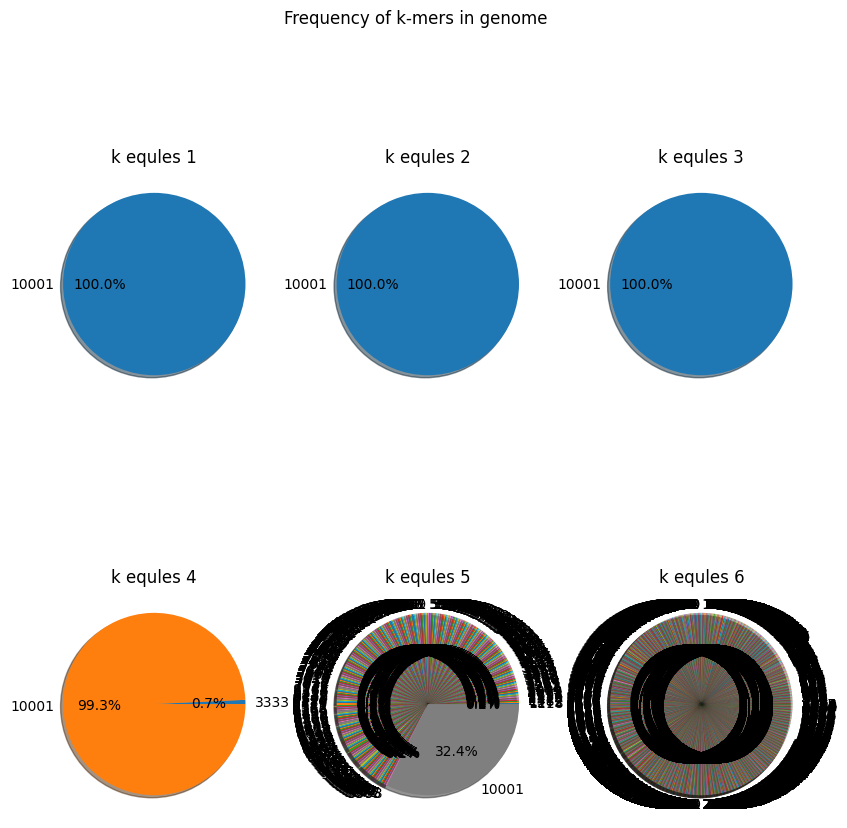

In [ ]:
ctr = 0
fig, ax = plt.subplots(2,3, figsize=(10,10))
fig.suptitle('Frequency of k-mers in genome')
for i in range(2):
  for j in range(3):
    ax[i,j].pie(list_of_df[ctr]['Number of k-mers'], labels=list_of_df[ctr]['Frequncy in genome'], autopct='%.1f%%', shadow=True, radius=1)
    ax[i,j].set_title('k equles {}'.format(ctr+1))
    ctr += 1


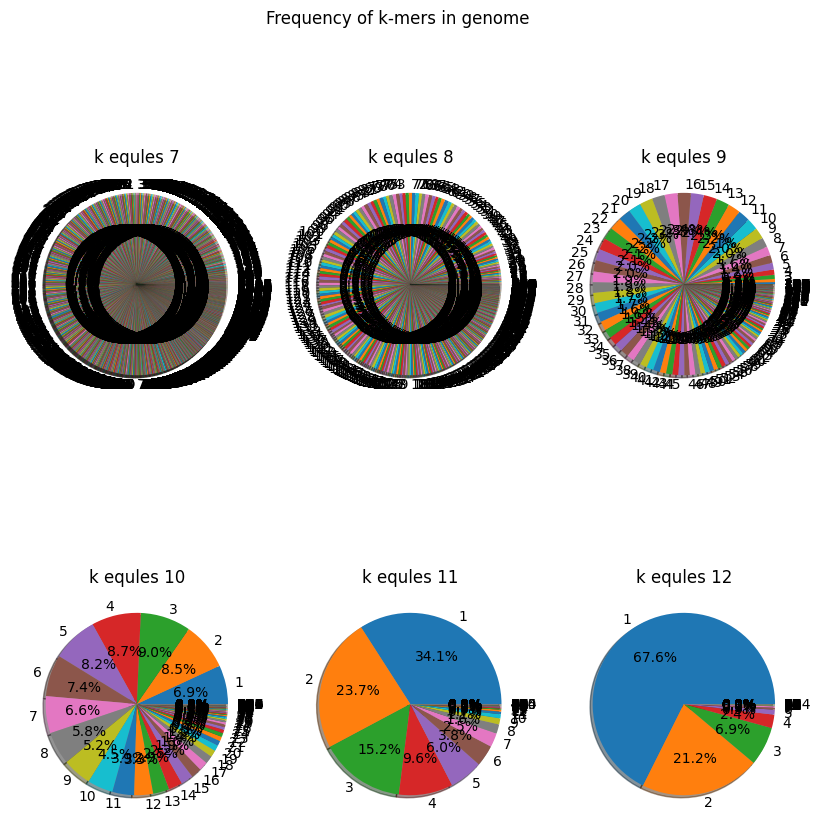

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(10,10))
fig.suptitle('Frequency of k-mers in genome')
for i in range(2):
  for j in range(3):
    ax[i,j].pie(list_of_df[ctr]['Number of k-mers'], labels=list_of_df[ctr]['Frequncy in genome'], autopct='%.1f%%', shadow=True, radius=1)
    ax[i,j].set_title('k equles {}'.format(ctr+1))
    ctr += 1

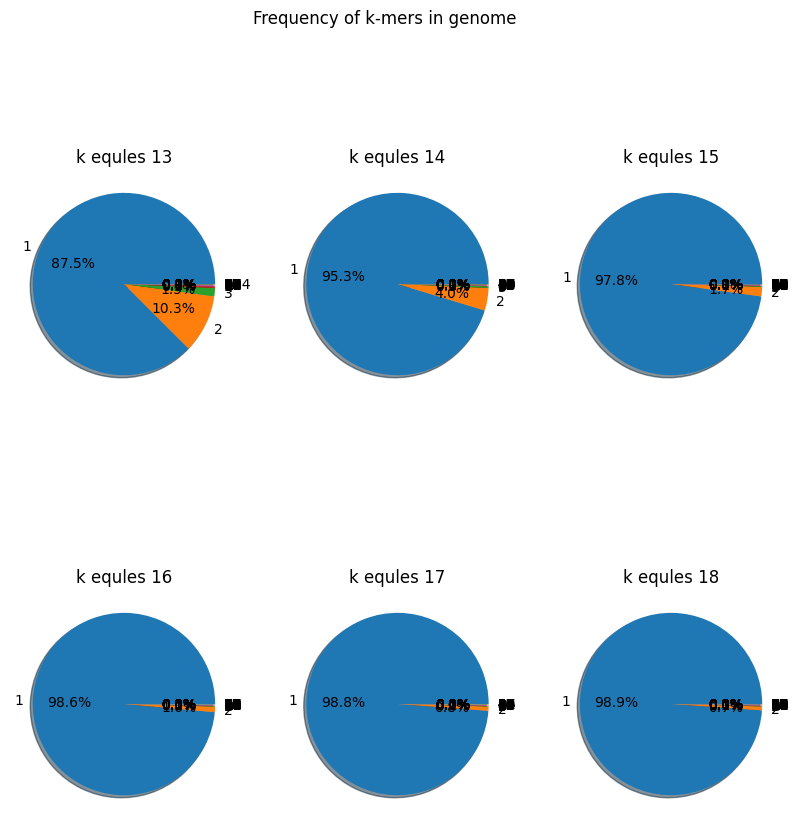

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(10,10))
fig.suptitle('Frequency of k-mers in genome')
for i in range(2):
  for j in range(3):
    ax[i,j].pie(list_of_df[ctr]['Number of k-mers'], labels=list_of_df[ctr]['Frequncy in genome'], autopct='%.1f%%', shadow=True, radius=1)
    ax[i,j].set_title('k equles {}'.format(ctr+1))
    ctr += 1

### И вот начиная с длины 22 мы наконец таки получаем 99% уникальных 22-меров

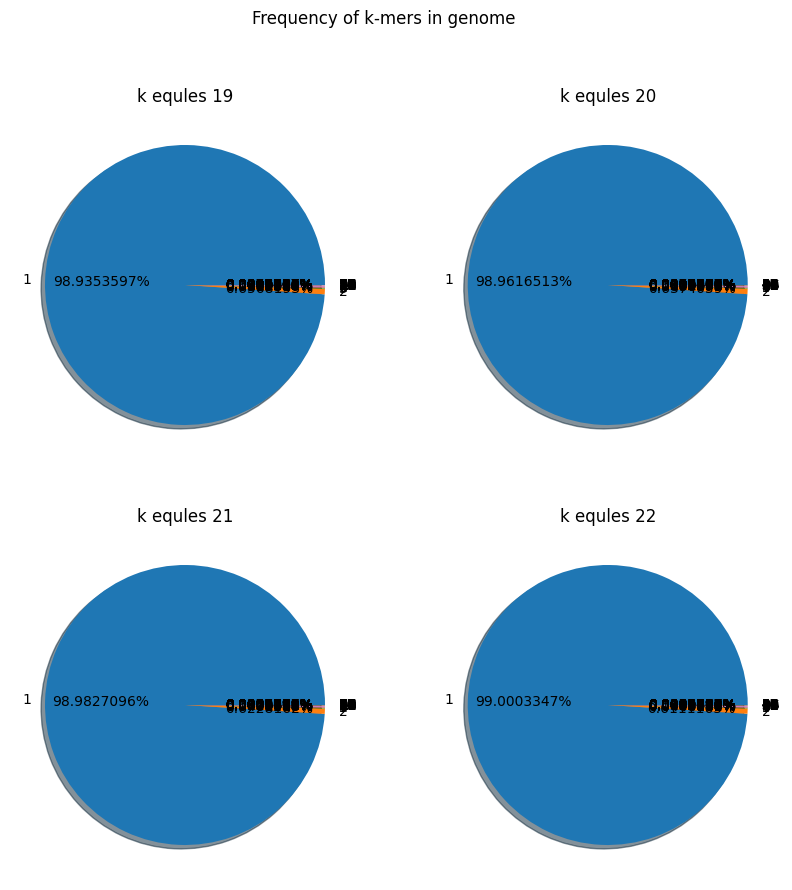

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Frequency of k-mers in genome')
for i in range(2):
  for j in range(2):
    ax[i,j].pie(list_of_df[ctr]['Number of k-mers'], labels=list_of_df[ctr]['Frequncy in genome'], autopct='%.7f%%', shadow=True, radius=1)
    ax[i,j].set_title('k equles {}'.format(ctr+1))
    ctr += 1

## Теперь нарисуем зависимость длины праймера от числа уникальных вариантов в геноме. Для этого нам нужна первая строчка каждого датафрейма. Я начал с длины 8 и дорисовал до длины 22, ибо до и после не информативно

In [ ]:
ylab = []
xlab = [i for i in range(8, 22)]
for i in range(8, 22):
  ylab.append(list_of_df[i].iloc[0,1]) # берем первое значение (количество уникальных к-меров)
ylab

[453,
 34774,
 519302,
 1955865,
 3299757,
 3925315,
 4138344,
 4204341,
 4225800,
 4234559,
 4239123,
 4242394,
 4245116,
 4247455]

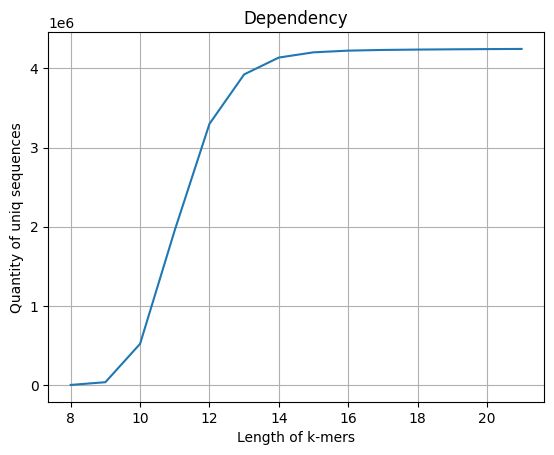

In [ ]:
plt.title("Dependency")
plt.xlabel("Length of k-mers")
plt.ylabel("Quantity of uniq sequences")
plt.grid()
plt.plot(xlab, ylab)
None